In [13]:
%run my_functions.ipynb

In [14]:
sat_formula = [[1,2,3],[-1,2,3],[1,-2,3],[1,2,-3],[-1,-2,-3]]

#(x1,x2,x3) = (0,1,1)

3 4
0
5
14


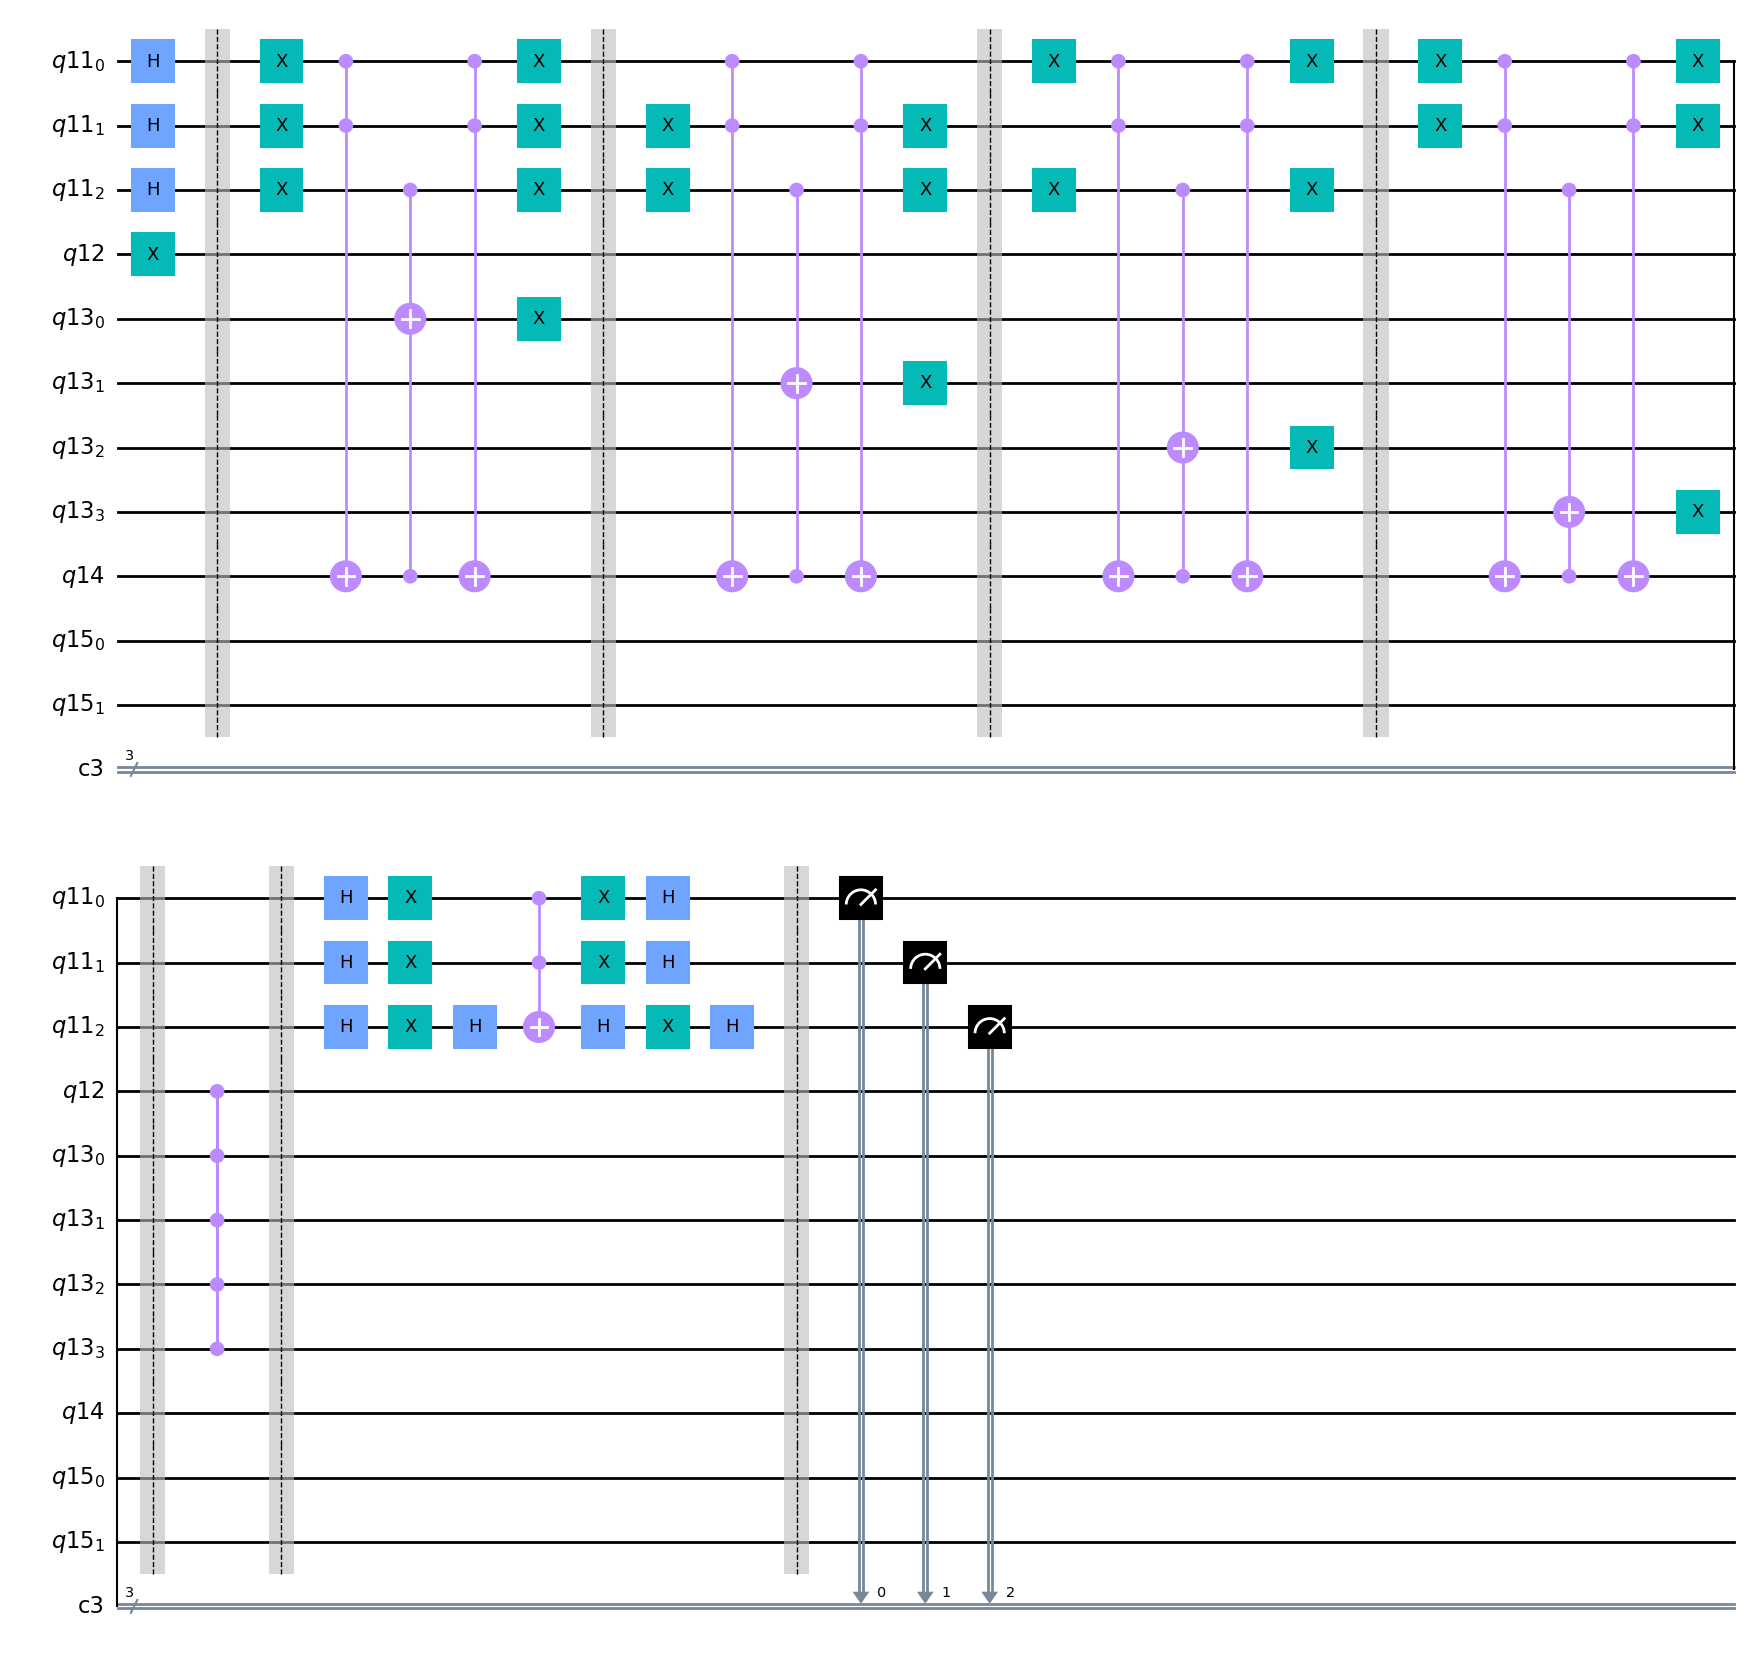

In [15]:
quant_part = []
for i in range(len(sat_formula)-1):
    quant_part += [sat_formula[i]]
qc = hybrid_sat3(quant_part)
qc.draw('mpl')

In [16]:
counts = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000).result().get_counts()
counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1], reverse=True)}
soln = []
all_soln = []
for key,value in counts.items():
    all_soln.append(key)
    if value>sum(counts.values())/len(counts):
        soln.append(key)

all_soln = [element[::-1] for element in all_soln]
quant_soln = [element[::-1] for element in soln]
print("Measurement results:",counts)
print("Max values above average from the dictionary:", quant_soln)

Measurement results: {'001': 2232, '100': 2201, '010': 2151, '000': 2145, '101': 326, '011': 322, '111': 318, '110': 305}
Max values above average from the dictionary: ['100', '001', '010', '000']


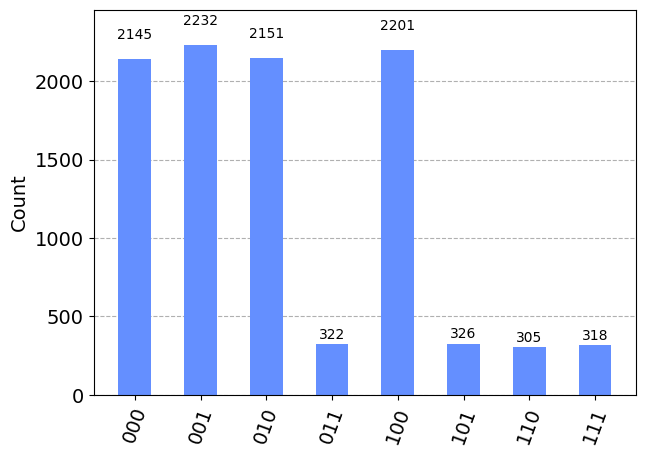

In [17]:
plot_histogram(counts)

In [18]:
brute_quant_soln = classical_sat_checker(quant_part,all_soln)
brute_full_soln = classical_sat_checker(sat_formula,all_soln)

In [19]:
print(len(brute_quant_soln))
print(len(quant_soln))

4
4


In [20]:
if quant_soln == brute_quant_soln:
    print('quant_solutions match with brute force solutions')
else:
     print('quant_solutions Do NOT match with brute force solutions')   

if len(brute_quant_soln)<len(all_soln)/2 or len(brute_quant_soln)==len(all_soln)/2:
    print('Number of True Solutions are less than number of False solutions, thus quant_soln is expected to be same as brute force soln')
else:
    print('Number of True solutions are more, thus quant_soln is not the same as the brute force soln')

quant_solutions Do NOT match with brute force solutions
Number of True Solutions are less than number of False solutions, thus quant_soln is expected to be same as brute force soln


In [21]:
new_quant_soln = classical_sat_checker(quant_part,quant_soln)
if new_quant_soln==['No solution exists']:
    new_quant_soln = [i for i in all_soln if i not in quant_soln]
new_quant_soln

['101', '110', '111', '011']

In [22]:
if new_quant_soln == brute_quant_soln:
    print('Solution for quantum part agrees with brute force solutions')

Solution for quantum part agrees with brute force solutions


In [23]:
classical_part = [sat_formula[-1]]
sat_solution = classical_sat_checker(classical_part,new_quant_soln)
sat_solution

['101', '110', '011']

In [24]:
if sat_solution == brute_full_soln:
    print('Solution for the sat problem agrees with brute force solutions')
else:
    print('Solutions do not agree with brute force solutions')

Solution for the sat problem agrees with brute force solutions
